In [1]:
import numpy as np
import matplotlib.pyplot as plt

virtual_wall_stddevs = np.loadtxt("/home/brano/Projects/thesis/virtual_error_measurements/deviations_by_laser_averaged/wall.txt")
wall_stddevs = np.loadtxt("./pcds/error_measurements/deviations_by_laser_averaged/wall.txt")


In [2]:
laser_id_to_angle = {
    0: -15,
    1: 1,
    2: -13,
    3: 3,
    4: -11,
    5: 5,
    6: -9,
    7: 7,
    8: -7,
    9: 9,
    10: -5,
    11: 11,
    12: -3,
    13: 13,
    14: -1,
    15: 15
}
laser_angle_to_id = {y:x for x,y in laser_id_to_angle.items()}
sorted_angles_asc = sorted(laser_angle_to_id.keys())
sorted_ids_by_angle = [laser_angle_to_id[angle] for angle in sorted_angles_asc]


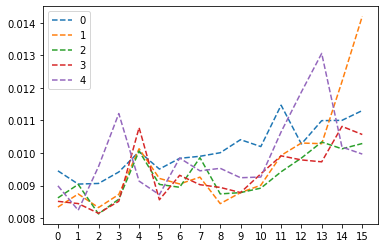

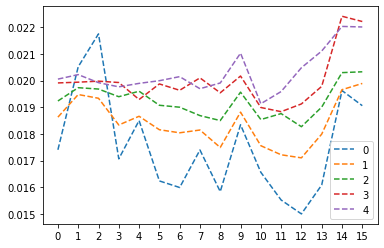

In [3]:
for dist in wall_stddevs:
    plt.plot(range(16), dist[sorted_ids_by_angle], "--")
plt.xticks(range(16))
plt.legend(range(5))

plt.show()

for dist in virtual_wall_stddevs:
    plt.plot(range(16), dist[sorted_ids_by_angle], "--")
plt.xticks(range(16))
plt.legend(range(5))
plt.show()



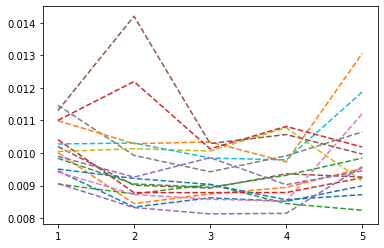

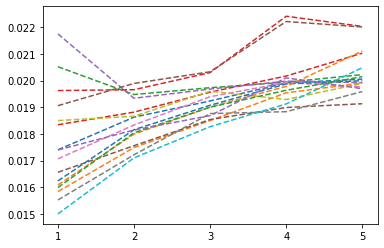

In [4]:
for laser in wall_stddevs.T:
    plt.plot(range(1, 6), laser, "--")
plt.xticks(range(1, 6))
plt.show()

for laser in virtual_wall_stddevs.T:
    plt.plot(range(1, 6), laser, "--")
plt.xticks(range(1, 6))
plt.show()

[0.00950521 0.00921781 0.00903419 0.00856255 0.00871875]


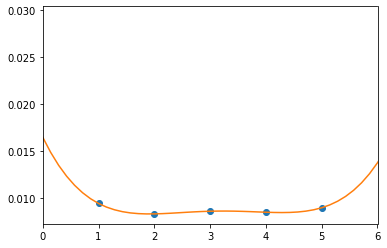

In [5]:
x = range(1, 6)
y = wall_stddevs.T[0]

fit = np.polyfit(x, y, 4)
f = np.poly1d(fit)
print(wall_stddevs.T[10])

# calculate new x's and y's
x_new = np.linspace(0, 7, 50)
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

In [ ]:
def make_polynomials():
    result = np.zeros([16, 5])
    for i in range(16):
        x = range(1, 6)
        y = floor_stddevs.T[i]
        coeffs = np.polyfit(x, y, 4)
        result[i, :] = coeffs
    np.savetxt("wall_polynomials.txt", result)